<a href="https://colab.research.google.com/github/rezamohamadlo/Clothes-Classifier-Using-CNNs/blob/main/improvingFmnUsingNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import tensorflow as tf  # TensorFlow for deep learning
import matplotlib.pyplot as plt  # Matplotlib for plotting images
from tensorflow.keras.utils import to_categorical, plot_model  # Utility functions for Keras

# Loading the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist  # Assigning the dataset to a variable
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()  # Splitting the data into training and test sets

# 'training_images' and 'training_labels' contain the images and corresponding labels for the training set.
# 'test_images' and 'test_labels' contain the images and corresponding labels for the test set.


In [2]:
# Normalizing the images
training_images, test_images = training_images / 255.0, test_images / 255.0

# The pixel values of the images range from 0 to 255.
# Dividing by 255.0 scales the values to a range of 0 to 1.
# This normalization helps the neural network converge faster during training.


In [3]:
# Printing the shape of the training and test datasets
print(training_images.shape)  # Output the shape of the training images
print(training_labels.shape)  # Output the shape of the training labels
print(test_images.shape)      # Output the shape of the test images
print(test_labels.shape)      # Output the shape of the test labels

# These shapes provide information about the structure of the datasets:
# 'training_images.shape' will typically be (60000, 28, 28), indicating 60,000 images of 28x28 pixels.
# 'training_labels.shape' will typically be (60000,), indicating 60,000 labels corresponding to the training images.
# 'test_images.shape' will typically be (10000, 28, 28), indicating 10,000 images of 28x28 pixels for testing.
# 'test_labels.shape' will typically be (10000,), indicating 10,000 labels corresponding to the test images.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# Defining an array of class names. Each item in the array represents the label for a type of clothing.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Printing the class names to verify
print(class_names)

# The class_names array provides a human-readable label for each of the 10 integer labels in the dataset.
# For example:
# 0 -> 'T-shirt/top'
# 1 -> 'Trouser'
# 2 -> 'Pullover'
# 3 -> 'Dress'
# 4 -> 'Coat'
# 5 -> 'Sandal'
# 6 -> 'Shirt'
# 7 -> 'Sneaker'
# 8 -> 'Bag'
# 9 -> 'Ankle boot'


['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


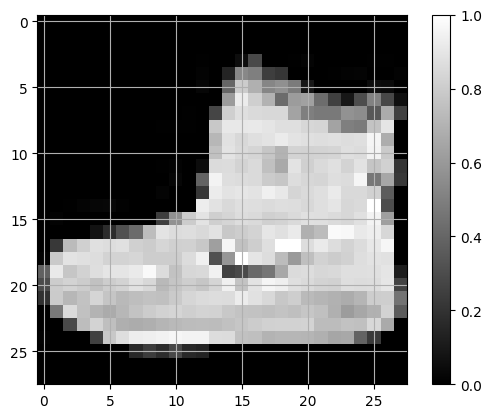

Class ID: 9 and Class name: Ankle boot


In [5]:
# Inspecting the data in the array by visualizing an image
index = 0  # Index of the image to be displayed (change this number to see different images)

# Displaying the image at the specified index
plt.imshow(training_images[index], cmap='gray')  # 'cmap='gray'' displays the image in grayscale
plt.colorbar()  # Displays a color bar on the right side of the image for intensity reference
plt.grid(True)  # Displays a grid over the image
plt.show()  # Shows the image

# Printing the class ID and corresponding class name for the displayed image
print("Class ID: %s and Class name: %s" % (training_labels[index], class_names[training_labels[index]]))

# 'training_images[index]' refers to the image at the specified index.
# 'training_labels[index]' provides the label (class ID) for that image.
# 'class_names[training_labels[index]]' retrieves the human-readable class name for that label.


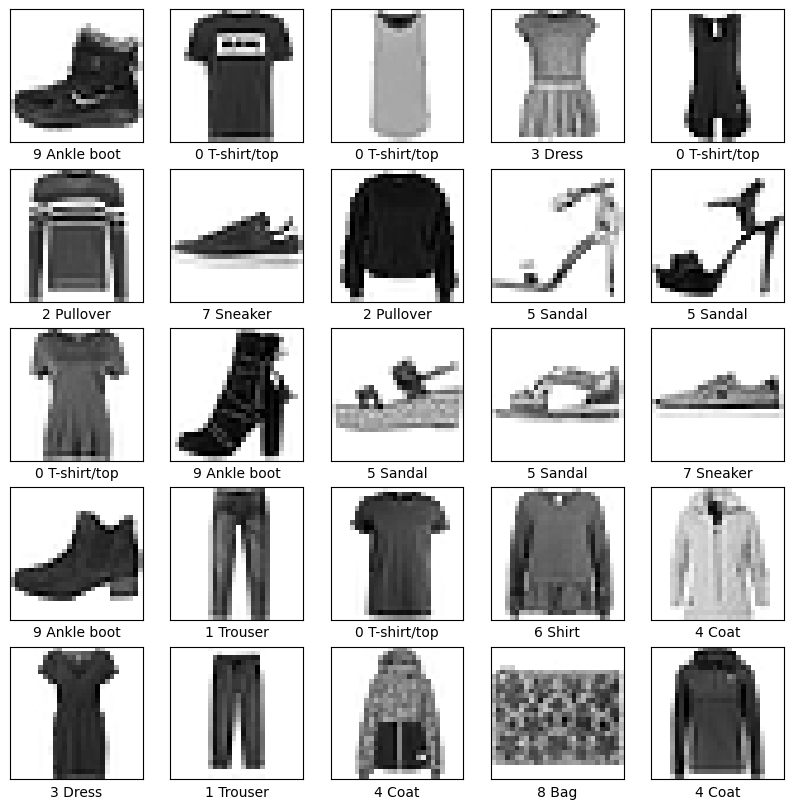

In [6]:
# Displaying the first 25 images from the training set

plt.figure(figsize=(10, 10))  # Setting the size of the figure to be 10x10 inches

for i in range(25):  # Loop through the first 25 images
    plt.subplot(5, 5, i + 1)  # Create a 5x5 grid of subplots and select the i+1th subplot
    plt.xticks([])  # Remove the x-axis ticks
    plt.yticks([])  # Remove the y-axis ticks
    plt.grid(False)  # Disable the grid
    plt.imshow(training_images[i], cmap=plt.cm.binary)  # Display the image in binary (black and white) format
    plt.xlabel("%s %s" % (training_labels[i], class_names[training_labels[i]]))  # Label the image with its class ID and name

plt.show()  # Display all the images in the grid

# This code creates a 5x5 grid to display the first 25 images from the training set.
# Each image is shown without ticks and gridlines for clarity, with its corresponding class ID and name displayed below.
# The use of 'cmap=plt.cm.binary' ensures that the images are shown in black and white, reflecting the binary nature of the pixel values.


In [7]:
# One hot encoding of the labels.
#(generally we do one hot encoding of the features in EDA but in this case we are doing it for labels)

# Before one hot encoding
print("ytrain Shape: %s and values: %s" % (training_labels.shape, training_labels))
print("ytest Shape: %s and values: %s" % (test_labels.shape, test_labels))

training_lables=to_categorical(training_labels)
test_lables=to_categorical(test_labels)

# After one hot encoding
print("ytrain Shape: %s and value for the first one: %s" % (training_lables.shape, training_lables[0]))
print("ytest Shape: %s and value for the first one: %s" % (test_lables.shape, test_lables[1]))

ytrain Shape: (60000,) and values: [9 0 0 ... 3 0 5]
ytest Shape: (10000,) and values: [9 2 1 ... 8 1 5]
ytrain Shape: (60000, 10) and value for the first one: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
ytest Shape: (10000, 10) and value for the first one: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
# Defining the neural network model
model = tf.keras.models.Sequential([  # Sequential model, where each layer has one input tensor and one output tensor
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
    # Convolutional layer with 32 filters, each of size 3x3
    # 'activation=tf.nn.relu' specifies ReLU activation function
    # 'input_shape=(28, 28, 1)' defines the input shape (28x28 pixels, 1 channel for grayscale)

    tf.keras.layers.MaxPooling2D(2, 2),
    # Max pooling layer with a pool size of 2x2
    # Reduces the spatial dimensions (height and width) by a factor of 2

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    # Second convolutional layer with 64 filters, each of size 3x3

    tf.keras.layers.MaxPooling2D(2, 2),
    # Second max pooling layer with a pool size of 2x2

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
    # Third convolutional layer with 128 filters, each of size 3x3

    tf.keras.layers.MaxPooling2D(2, 2),
    # Third max pooling layer with a pool size of 2x2

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    # Flatten layer to convert the 3D output of the convolutional layers into a 1D vector

    tf.keras.layers.Dense(128, activation='relu'),
    # Fully connected (dense) layer with 128 units and ReLU activation

    tf.keras.layers.Dense(10, activation='softmax')
    # Output layer with 10 units (one for each class) and softmax activation
    # The softmax function outputs a probability distribution over the 10 classes
])

# Summarizing the model architecture
model.summary()

# 'model.summary()' displays a summary of the model's architecture, including:
# - The layer type (Conv2D, MaxPooling2D, Flatten, Dense)
# - The output shape of each layer
# - The number of parameters in each layer
# This summary provides a quick overview of the model's structure and complexity.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [9]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# The 'adam' optimizer is used for efficient gradient-based optimization.
# 'categorical_crossentropy' is used as the loss function for multi-class classification tasks.
# 'metrics=['accuracy']' specifies that the accuracy of the model should be evaluated during training and testing.

# Training the model
model.fit(training_images, training_labels, epochs=15)
# 'training_images' and 'training_labels' are the input data and labels, respectively.
# 'epochs=15' specifies that the model will train for 15 complete passes through the training dataset.

# Evaluating the model on the test set
model.evaluate(test_images, test_labels)
# 'test_images' and 'test_labels' are the input data and labels for the test set.
# The 'evaluate' method returns the loss value and metrics (accuracy in this case) for the model on the test data.


Epoch 1/15
1875/1875 [==============================] - 15s 5ms/step - loss: 0.6546 - accuracy: 0.7566
Epoch 2/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4482 - accuracy: 0.8343
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3939 - accuracy: 0.8550
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3645 - accuracy: 0.8644
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3474 - accuracy: 0.8712
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3324 - accuracy: 0.8776
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3236 - accuracy: 0.8781
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3143 - accuracy: 0.8836
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3052 - accuracy: 0.8857
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2

[0.29830101132392883, 0.8881999850273132]